# Using cartopy to map global gene abundances

In [1]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
output_folder= '/vortexfs1/omics/alexander/lblum/tara_gene_finder/results/gene_abundances/output_figures'

In [3]:
#metadata for sampling locations
pangea=pd.read_csv('/vortexfs1/omics/alexander/lblum/tara_gene_finder/results/gene_abundances/PANGEA_Merged_TARA.csv')

In [6]:
#reading in our nifH gene abundances normalized to Reads per kilobase million (RPKM) and environmental metadata
nifH_metaG_df=pd.read_csv('/vortexfs1/omics/alexander/lblum/tara_gene_finder/results/gene_abundances/diamond_mapping/nifH/nifH_metaG_abundance_wenv_table.csv')
nifH_depth_alone = pd.DataFrame(nifH_metaG_df.groupby(['Depth'])['gene_abundance'].sum())
nifH_depth_alone=pd.DataFrame(nifH_depth_alone)

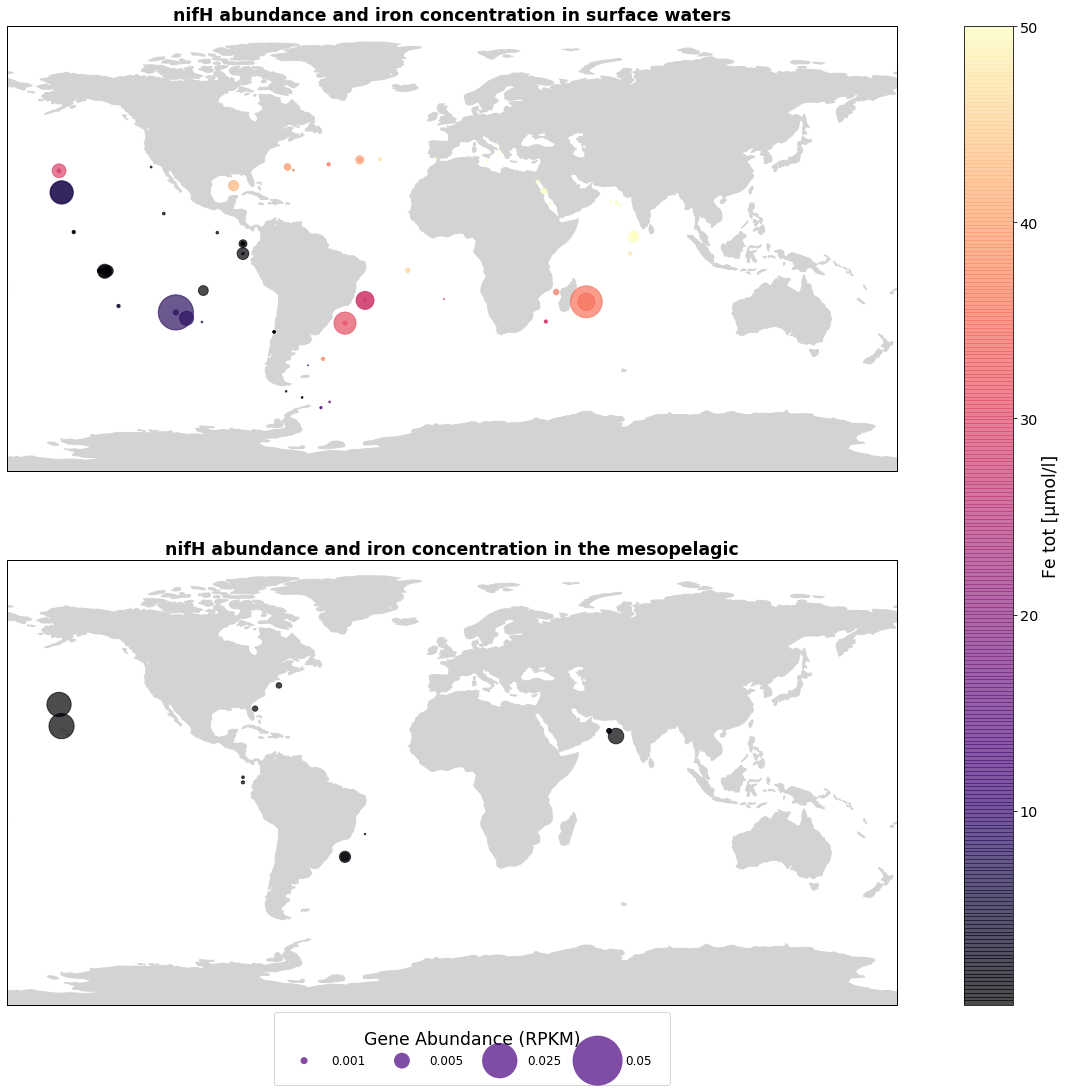

In [29]:
#NifH abundance in surface and mesopelagic waters plotted with iron concentration.

fig = plt.figure(figsize=(24, 18))

ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())

color_var='Fe tot [µmol/l]'
cmap = cm.magma
sm = cm.ScalarMappable(cmap=cmap)

ax.add_feature(cfeature.LAND, color='lightgray')
nifH_metaG_srf=nifH_metaG_df.loc[nifH_metaG_df['Depth']== 'SRF']
lat_lon=nifH_metaG_srf.loc[:,['run_accession','Latitude_x','Longitude_x','gene_abundance',color_var]]
ax.scatter(lat_lon['Longitude_x'],lat_lon['Latitude_x'],s=lat_lon['gene_abundance']*50000, 
           c=lat_lon[color_var], 
           alpha=0.7, cmap=cmap)
ax.set_global()


l1 = plt.scatter([],[], s=0.001*50000, edgecolors='none', color='indigo', alpha=0.7)
l2 = plt.scatter([],[], s=0.005*50000, edgecolors='none', color='indigo', alpha=0.7)
l3 = plt.scatter([],[], s=0.025*50000, edgecolors='none', color='indigo',alpha=0.7)
l4 = plt.scatter([],[], s=0.05*50000, edgecolors='none', color='indigo', alpha=0.7)

labels = ["0.001", "0.005", "0.025", "0.05"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True,
handlelength=2, loc = [0.3,-0.18], borderpad = 1.5,
handletextpad=1.3, title='Gene Abundance (RPKM)', fontsize='large', title_fontsize= 'xx-large', scatterpoints = 1)

ax.set_title('nifH abundance and iron concentration in surface waters', fontsize='xx-large', fontweight='bold')


ax2.add_feature(cfeature.LAND, color='lightgray')
nifH_metaG_mes=nifH_metaG_df.loc[nifH_metaG_df['Depth']== 'MES']
lat_lon=nifH_metaG_mes.loc[:,['run_accession','Latitude_x','Longitude_x','gene_abundance',color_var]]
sc2=ax2.scatter(lat_lon['Longitude_x'],lat_lon['Latitude_x'],s=lat_lon['gene_abundance']*50000, 
            c=lat_lon[color_var], 
            norm= colors.Normalize(vmin=0.1, vmax=50), alpha=0.7, cmap=cmap)
ax2.set_global()
ax2.set_title('nifH abundance and iron concentration in the mesopelagic', fontsize='xx-large', fontweight='bold')


cb = fig.colorbar(sc2, ax=(ax, ax2), orientation='vertical')
cb.set_label(color_var, fontsize='xx-large')
cb.ax.tick_params(labelsize='x-large')


fig.savefig(os.path.join(output_folder,'nifH_abundance_iron_map.png'), bbox_inches='tight')

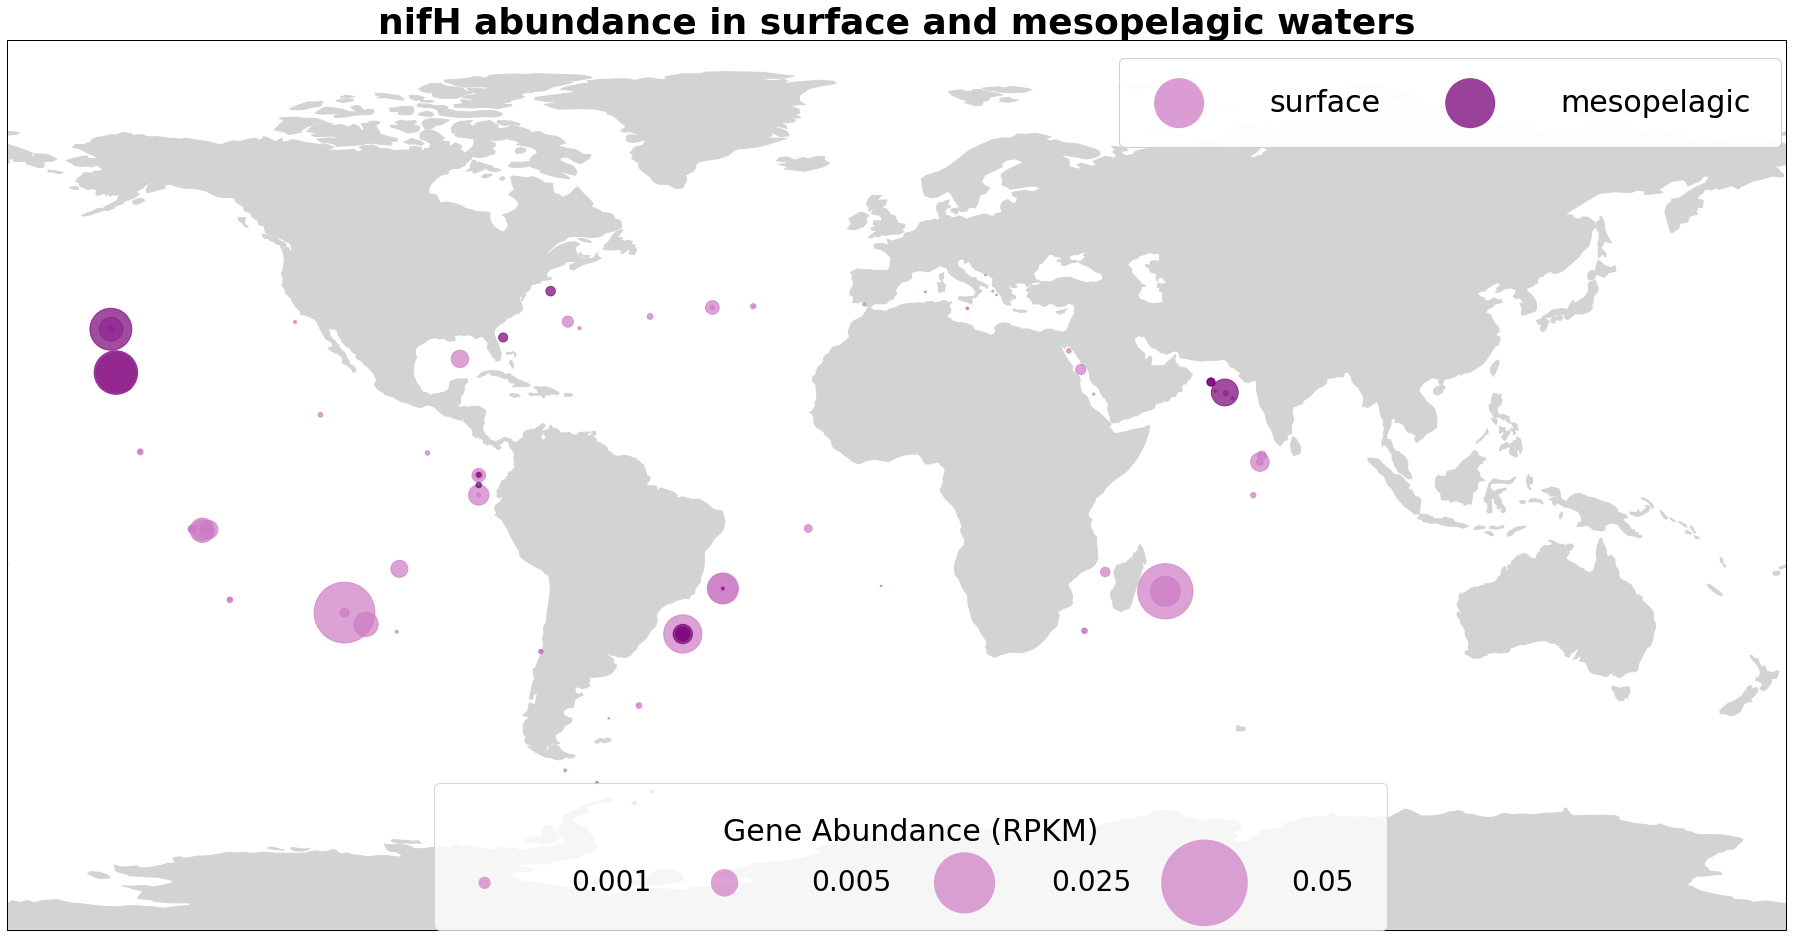

In [26]:
#nifH gene abundance in RPKM in surface and mesopelagic waters
fig = plt.figure(figsize=(48, 36))

ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, color='lightgray')
nifH_metaG_srf=nifH_metaG_df.loc[nifH_metaG_df['Depth']== 'SRF']
lat_lon=nifH_metaG_srf.loc[:,['run_accession','Latitude_x','Longitude_x','gene_abundance']]
ax.scatter(lat_lon['Longitude_x'],lat_lon['Latitude_x'],s=lat_lon['gene_abundance']*150000, 
           color='#CE7BC5', alpha=0.7)

nifH_metaG_mes=nifH_metaG_df.loc[nifH_metaG_df['Depth']== 'MES']
lat_lon=nifH_metaG_mes.loc[:,['run_accession','Latitude_x','Longitude_x','gene_abundance']]
ax.scatter(lat_lon['Longitude_x'],lat_lon['Latitude_x'],s=lat_lon['gene_abundance']*150000, 
           color='#780178', alpha=0.7)
ax.set_global()


#l1 = plt.scatter([],[], s=0.001*150000, edgecolors='none', color='#CE7BC5', alpha=0.7)
#l2 = plt.scatter([],[], s=0.005*150000, edgecolors='none', color='#CE7BC5', alpha=0.7)
#l3 = plt.scatter([],[], s=0.025*150000, edgecolors='none', color='#CE7BC5',alpha=0.7)
#l4 = plt.scatter([],[], s=0.05*150000, edgecolors='none', color='#CE7BC5', alpha=0.7)

#d1 = plt.scatter([],[], s=0.025*100000, edgecolors='none', color='#CE7BC5', alpha=0.7)
#d2 = plt.scatter([],[], s=0.025*100000, edgecolors='none', color='#780178', alpha=0.7)
#for some reason these are making dots in the corner. commented them out to remove.

labels = ["0.001", "0.005", "0.025", "0.05"]
labels2 = ["surface", "mesopelagic"]

leg1 = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True,
handlelength=1.2, loc = [0.24,0], borderpad = 1.2,
handletextpad=2.5, title='Gene Abundance (RPKM)', 
labelspacing = 0.8, fontsize='28', title_fontsize= '30', scatterpoints = 1)

leg2 = plt.legend([d1, d2], labels2, ncol=2, frameon=True,
handlelength=2, loc = [0.625,0.88], borderpad = 1,
handletextpad=2, fontsize='30', scatterpoints = 1)

ax.add_artist(leg1)
ax.add_artist(leg2)

ax.set_title('nifH abundance in surface and mesopelagic waters', fontsize= 36, fontweight='bold')

fig.savefig(os.path.join(output_folder,'nifH_abundance_surf_mes_map_resized.png'), bbox_inches='tight')